In [1]:
# dataframes
import pandas as pd
from numpy.random import rand, randn, beta, poisson
from numpy import sin
import numpy as np
import scipy
import math

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa


In [2]:
df = pd.read_csv('shark_tank.csv', encoding='latin-1')

In [ ]:
df.head()

,Season.Number,Season.Start,Season.End,Episode.Number,Pitch.Number,Original.Air.Date,Startup.Name,Industry,Business.Description,Pitchers.Gender,...,Kevin.O.Leary.Investment.Equity,Guest.Investment.Amount,Guest.Investment.Equity,Guest.Name,Barbara.Corcoran.Present,Mark.Cuban.Present,Lori.Greiner.Present,Robert.Herjavec.Present,Daymond.John.Present,Kevin.O.Leary.Present
0,1,08/09/2009,02/05/2010,1,1,08/09/2009,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
1,1,08/09/2009,02/05/2010,1,2,08/09/2009,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
2,1,08/09/2009,02/05/2010,1,3,08/09/2009,Wispots,Business Services,Wispots - Consumer Services,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
3,1,08/09/2009,02/05/2010,1,4,08/09/2009,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1
4,1,08/09/2009,02/05/2010,1,5,08/09/2009,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,0.0,0.0,0.0,NaN,1,0,0,1,1,1


In [3]:
df_copy = df.copy()

total = df_copy['Total.Deal.Amount']

df_copy = df_copy[['Valuation.Requested','Royalty.Deal','Deal.Valuation','Number.of.sharks.in.deal','Original.Ask.Amount',\
                   'Original.Offered.Equity', 'Got.Deal','Season.Number', 'Pitch.Number', \
                   'Loan', 'Multiple.Entrepreneurs','Multiple.Entrepreneurs', \
                   'Barbara.Corcoran.Present', 'Mark.Cuban.Present', \
                   'Lori.Greiner.Present', 'Robert.Herjavec.Present', 'Daymond.John.Present', 'Kevin.O.Leary.Present', 'Industry']]

dumm = pd.get_dummies(data=df_copy,drop_first=True)
X = sm.add_constant(dumm)

model_industry = sm.OLS(total, X).fit()
model_industry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total.Deal.Amount   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     68.61
Date:                Mon, 15 May 2023   Prob (F-statistic):          5.12e-229
Time:                        18:19:47   Log-Likelihood:                -14846.
No. Observations:                1097   AIC:                         2.976e+04
Df Residuals:                    1065   BIC:                         2.992e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -6.472e+04   8.18e+04     -0.791      0.429   -2.25e+05    9.59e+04
Valuation.Requested                 -0.0209      0.002     -9.209      0.000      -0.025      -0.016
Royalty.Deal                     -9.764e+04   2.67e+04     -3.660      0.000    -1.5e+05   -4.53e+04
Deal.Valuation                       0.0594      0.003     21.515      0.000       0.054       0.065
Number.of.sharks.in.deal          4.657e+04   1.19e+04      3.904      0.000    2.32e+04       7e+04
Original.Ask.Amount                  0.4594      0.023     19.926      0.000       0.414       0.505
Original.Offered.Equity           -872.8070    788.057     -1.108      0.268   -2419.127     673.513
Got.Deal                          1.366e+05   2.06e+04      6.642      0.000    9.62e+04    1.77e+05
Season.Number                    -4723.6279    1.4e+04     -0.338      0.736   -3.22e+04    2.27e+04
Pitch.Number                        77.0503    145.096      0.531      0.596    -207.656     361.756
Loan                             -8.951e+04   3.15e+04     -2.845      0.005   -1.51e+05   -2.78e+04
Multiple.Entrepreneurs            9576.3786   6992.965      1.369      0.171   -4145.175    2.33e+04
Multiple.Entrepreneurs            9576.3786   6992.965      1.369      0.171   -4145.175    2.33e+04
Barbara.Corcoran.Present          1.874e+04   1.91e+04      0.983      0.326   -1.87e+04    5.61e+04
Mark.Cuban.Present               -1.634e+04   2.86e+04     -0.572      0.568   -7.24e+04    3.97e+04
Lori.Greiner.Present               5.56e+04   2.68e+04      2.071      0.039    2932.060    1.08e+05
Robert.Herjavec.Present           2.557e+04   1.76e+04      1.451      0.147   -9003.556    6.02e+04
Daymond.John.Present              3.275e+04   1.87e+04      1.752      0.080   -3927.246    6.94e+04
Kevin.O.Leary.Present             3.134e+04   3.16e+04      0.992      0.322   -3.07e+04    9.33e+04
Industry_Business Services       -1.134e+05   6.03e+04     -1.883      0.060   -2.32e+05    4791.116
Industry_Children/Education      -1.318e+05    5.3e+04     -2.489      0.013   -2.36e+05   -2.79e+04
Industry_Electronics             -1.593e+05   7.06e+04     -2.257      0.024   -2.98e+05   -2.08e+04
Industry_Fashion/Beauty           -1.18e+05   5.17e+04     -2.284      0.023   -2.19e+05   -1.66e+04
Industry_Fitness/Sports/Outdoors -1.228e+05   5.31e+04     -2.314      0.021   -2.27e+05   -1.87e+04
Industry_Food and Beverage       -1.046e+05   5.14e+04     -2.037      0.042   -2.05e+05   -3855.293
Industry_Green/CleanTech         -1.425e+05   7.55e+04     -1.886      0.060   -2.91e+05    5742.660
Industry_Health/Wellness         -8.507e+04   5.63e+04     -1.511      0.131   -1.96e+05    2.54e+04
Industry_Lifestyle/Home          -1.378e+05   5.17e+0

In [4]:
tda = df['Total.Deal.Amount']
x = df_copy
dumm = pd.get_dummies(data = x, drop_first = True)
X = sm.add_constant(dumm)
model = sm.OLS(tda, X)
results_0 = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


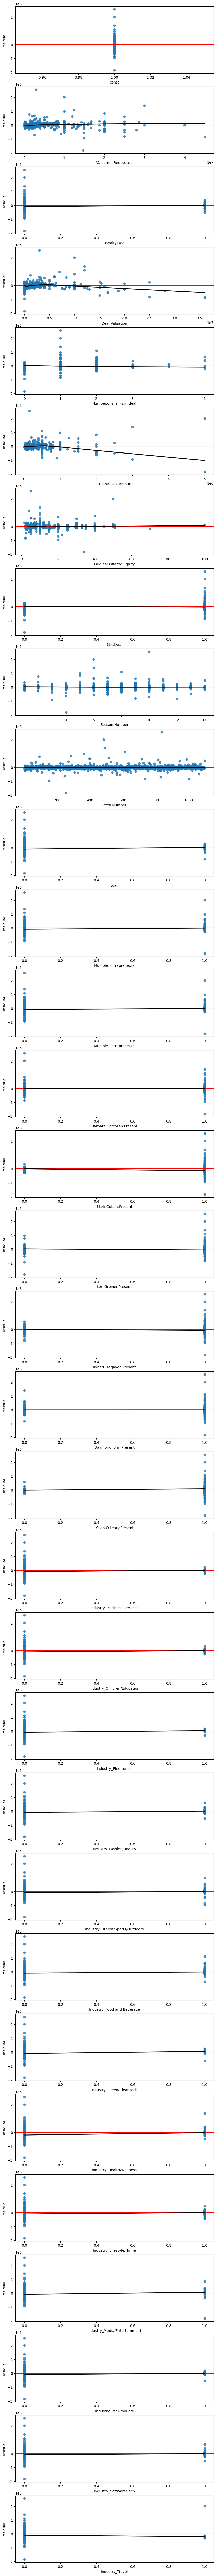

In [5]:
#plot a histogram for const!!!
fig, ax = plt.subplots(32,figsize =(10,130))
resid_0 = results_0.resid
#plt.axhline(y=0.5, color='r', linestyle='-')

for i in range(32): 
  # create a residual plot for that variable ('i' indexes the variables)
  # The argument ax = ax[i] puts the plot into the subplot
  ax[i].axhline(y=0.5, color='r', linestyle='-')
  sns.regplot(x = X.iloc[:,i], y = resid_0, lowess=True, ax = ax[i], line_kws = {'color': 'black'})
  #sns.regplot(x = X.iloc[:,i], y = resid, lowess=True, ax = ax[i])

  ax[i].set_xlabel(X.columns[i])
  ax[i].set_ylabel("residual")

In [6]:
def var_c(r):
  size = int(r.df_model)
  fig, ax = plt.subplots(size,figsize =(10,120))
  resid = r.resid
  for i in range(size): 
    sns.regplot(x = X.iloc[:,i], y = abs(resid), lowess=True, ax = ax[i],line_kws = {'color': 'black'})
    ax[i].set_xlabel(X.columns[i])
    ax[i].set_ylabel("abs(residual)")

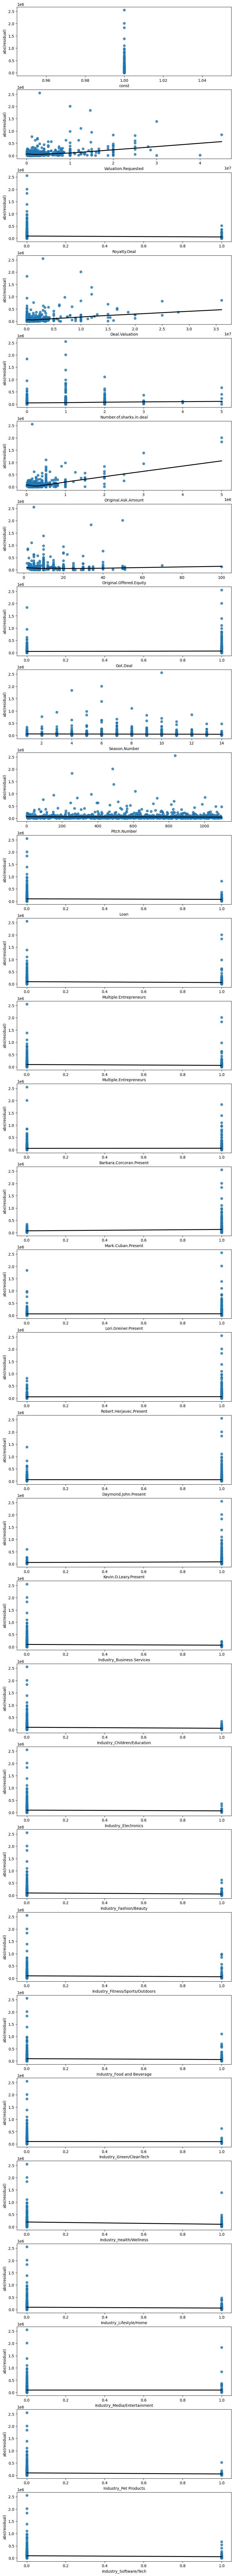

In [7]:
var_c(results_0)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.00655985, -0.0244923 ,  0.04209417, -0.00316   ,  0.03513913,
         0.01116075, -0.01681964,  0.00808256, -0.00382517, -0.01323204,
         1.        , -0.01323204, -0.00382517,  0.00808256, -0.01681964,
         0.01116075,  0.03513913, -0.00316   ,  0.04209417, -0.0244923 ,
         0.00655985]),
 <matplotlib.lines.Line2D at 0x7f6a8627ffd0>)

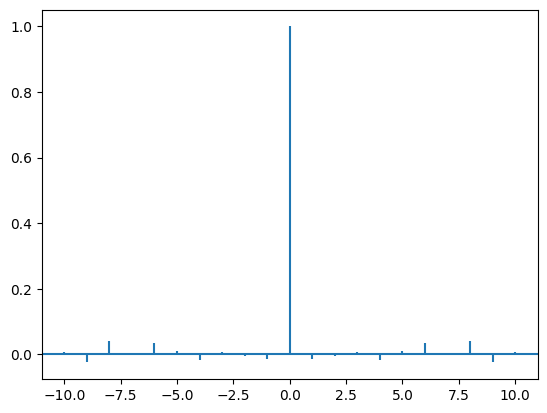

In [8]:
plt.acorr(resid_0)

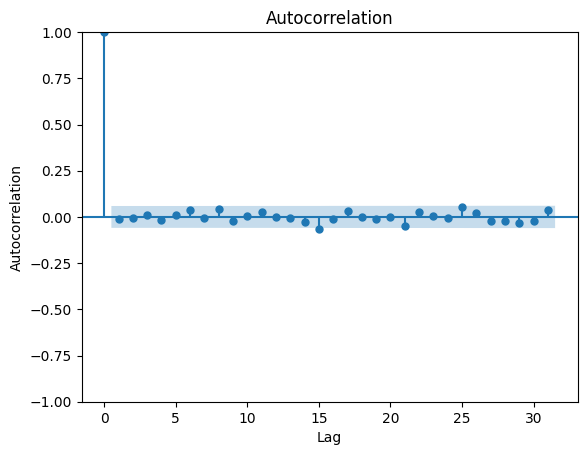

In [10]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(resid_0)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

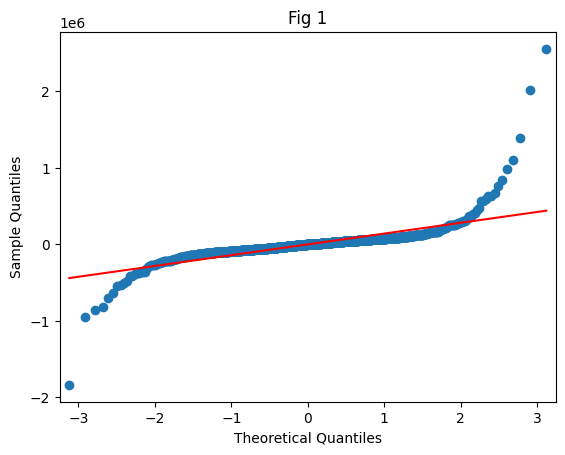

In [11]:
sm.qqplot(resid_0, line = 'r') 
plt.title("Fig 1")
plt.show()

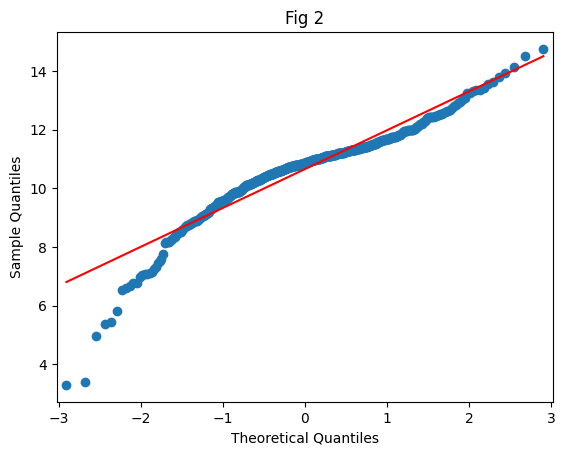

In [13]:
log = np.log(resid_0)
no = log.dropna()
sm.qqplot(no, line = 'r') 
plt.title("Fig 2")
plt.show()

In [ ]:
log.dropna

<bound method Series.dropna of 0            NaN
1       5.129585
2            NaN
3       4.421056
4            NaN
          ...   
1092    4.815758
1093         NaN
1094         NaN
1095         NaN
1096    5.677532
Length: 1097, dtype: float64>

In [ ]:
len(df)
filter = df.select_dtypes(include=np.number)
filter

,Season.Number,Episode.Number,Pitch.Number,Multiple.Entrepreneurs,Original.Ask.Amount,Original.Offered.Equity,Valuation.Requested,Got.Deal,Total.Deal.Amount,Total.Deal.Equity,...,Kevin.O.Leary.Investment.Amount,Kevin.O.Leary.Investment.Equity,Guest.Investment.Amount,Guest.Investment.Equity,Barbara.Corcoran.Present,Mark.Cuban.Present,Lori.Greiner.Present,Robert.Herjavec.Present,Daymond.John.Present,Kevin.O.Leary.Present
0,1,1,1,0,50000,15.0,333333,1,50000.0,55.0,...,0.0,0.0,0.0,0.0,1,0,0,1,1,1
1,1,1,2,0,460000,10.0,4600000,1,460000.0,50.0,...,0.0,0.0,0.0,0.0,1,0,0,1,1,1
2,1,1,3,0,1200000,10.0,12000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,1,1,1
3,1,1,4,0,250000,25.0,1000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,1,1,1
4,1,1,5,0,1000000,15.0,6666667,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,14,6,1093,0,300000,4.0,7500000,1,300000.0,10.0,...,0.0,0.0,150000.0,5.0,0,1,1,0,1,1
1093,14,6,1094,1,185000,8.0,2312500,1,225000.0,15.0,...,0.0,0.0,0.0,0.0,0,1,1,0,1,1
1094,14,7,1095,1,200000,5.0,4000000,1,200000.0,20.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,1
1095,14,7,1096,1,200000,15.0,1333333,1,200000.0,30.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,1


In [ ]:
ias = df['Investment.Amount.Per.Shark']
X = filter.loc[:,:'Investment.Amount.Per.Shark']
X = sm.add_constant(X)

model = sm.OLS(ias, X)
results_1 = model.fit()

results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Investment.Amount.Per.Shark   R-squared:                       1.000
Model:                                     OLS   Adj. R-squared:                  1.000
Method:                          Least Squares   F-statistic:                 3.343e+31
Date:                         Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                                 15:05:33   Log-Likelihood:                 22044.
No. Observations:                         1097   AIC:                        -4.406e+04
Df Residuals:                             1083   BIC:                        -4.399e+04
Df Model:                                   13                                         
Covariance Type:                     nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3.785e-10   8.78e-11      4.311      0.000    2.06e-10    5.51e-10
Season.Number               -6.215e-11   3.79e-11     -1.641      0.101   -1.36e-10    1.22e-11
Episode.Number               7.188e-12   2.27e-12      3.166      0.002    2.73e-12    1.16e-11
Pitch.Number                 6.157e-13   3.99e-13      1.541      0.124   -1.68e-13     1.4e-12
Multiple.Entrepreneurs       4.614e-11   3.43e-11      1.346      0.179   -2.11e-11    1.13e-10
Original.Ask.Amount           -3.7e-16   6.56e-17     -5.638      0.000   -4.99e-16   -2.41e-16
Original.Offered.Equity      1.871e-12   2.04e-12      0.916      0.360   -2.14e-12    5.88e-12
Valuation.Requested          6.918e-17   5.83e-18     11.865      0.000    5.77e-17    8.06e-17
Got.Deal                    -8.257e-11   7.04e-11     -1.173      0.241   -2.21e-10    5.56e-11
Total.Deal.Amount            -7.07e-17   2.16e-16     -0.327      0.743   -4.94e-16    3.53e-16
Total.Deal.Equity           -2.234e-12   1.39e-12     -1.611      0.107   -4.95e-12    4.87e-13
Deal.Valuation              -2.137e-17   8.57e-18     -2.493      0.013   -3.82e-17   -4.55e-18
Number.of.sharks.in.deal     2.496e-11   4.08e-11      0.612      0.541   -5.51e-11    1.05e-10
Investment.Amount.Per.Shark     1.0000   2.24e-16   4.46e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      310.443   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27051.070
Skew:                          -0.133   Prob(JB):                         0.00
Kurtosis:                      27.326   Cond. No.                     4.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


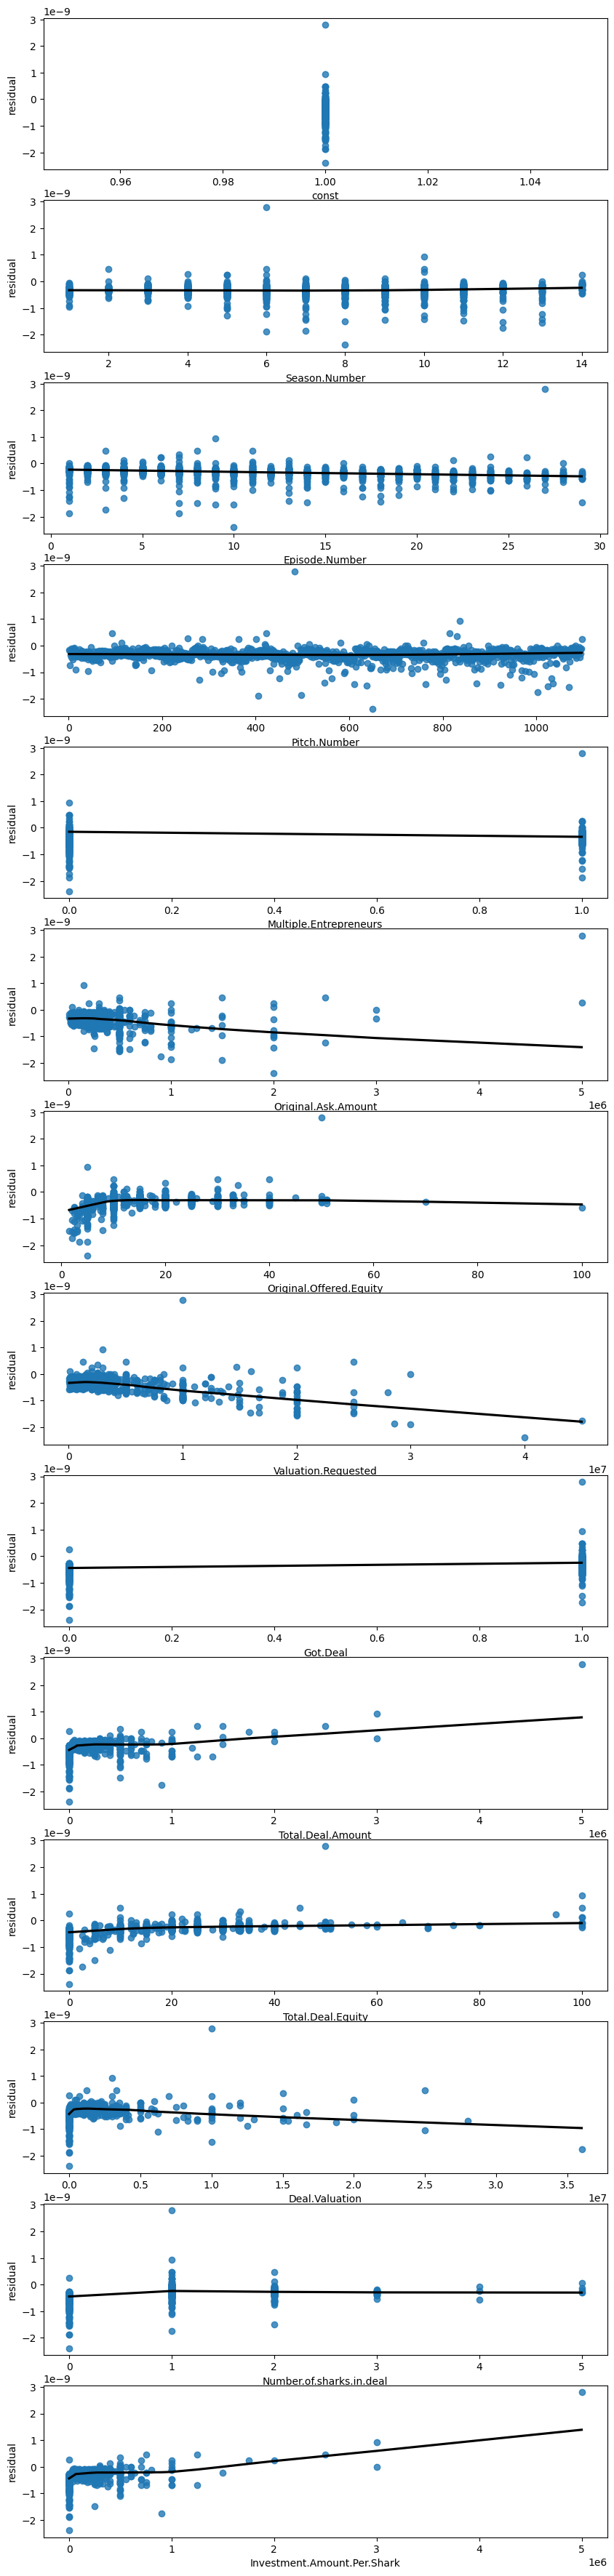

In [ ]:
fig, ax = plt.subplots(14,figsize =(10,45))
resid_1 = results_1.resid
for i in range(14): 
  # create a residual plot for that variable ('i' indexes the variables)
  # The argument ax = ax[i] puts the plot into the subplot
  sns.regplot(x = X.iloc[:,i], y = resid_1, lowess=True, ax = ax[i], line_kws = {'color': 'black'})
  #sns.regplot(x = X.iloc[:,i], y = resid, lowess=True, ax = ax[i])

  ax[i].set_xlabel(X.columns[i])
  ax[i].set_ylabel("residual")


FIRST ASSUMPTION

In [ ]:
ias = df['Investment.Amount.Per.Shark']
X = filter.loc[:]
X = sm.add_constant(X)

model = sm.OLS(ias, X)
results_2 = model.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Investment.Amount.Per.Shark   R-squared:                       1.000
Model:                                     OLS   Adj. R-squared:                  1.000
Method:                          Least Squares   F-statistic:                 6.931e+13
Date:                         Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                                 15:05:42   Log-Likelihood:                 265.11
No. Observations:                         1097   AIC:                            -458.2
Df Residuals:                             1061   BIC:                            -278.2
Df Model:                                   35                                         
Covariance Type:                     nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4.634e-10      0.071   6.53e-09      1.000      -0.139       0.139
Season.Number                       2.075e-11      0.023   9.12e-10      1.000      -0.045       0.045
Episode.Number                      1.768e-11      0.001   1.41e-08      1.000      -0.002       0.002
Pitch.Number                        5.455e-14      0.000   2.35e-10      1.000      -0.000       0.000
Multiple.Entrepreneurs             -4.803e-11      0.015  -3.19e-09      1.000      -0.030       0.030
Original.Ask.Amount                 8.382e-16   2.91e-08   2.88e-08      1.000   -5.72e-08    5.72e-08
Original.Offered.Equity            -7.971e-12      0.001  -9.06e-09      1.000      -0.002       0.002
Valuation.Requested                -3.606e-16   2.54e-09  -1.42e-07      1.000   -4.97e-09    4.97e-09
Got.Deal                           -7.588e-11      0.040   -1.9e-09      1.000      -0.078       0.078
Total.Deal.Amount                  -5.774e-07   1933.965  -2.99e-10      1.000   -3794.831    3794.831
Total.Deal.Equity                  -2.001e-10      0.176  -1.14e-09      1.000      -0.345       0.345
Deal.Valuation                      6.792e-16   4.19e-09   1.62e-07      1.000   -8.22e-09    8.22e-09
Number.of.sharks.in.deal           -8.242e-11      0.026  -3.11e-09      1.000      -0.052       0.052
Investment.Amount.Per.Shark            1.0000   1.07e-07   9.34e+06      0.000       1.000       1.000
Equity.Per.Shark                   -2.229e-12      0.002  -1.22e-09      1.000      -0.004       0.004
Royalty.Deal                        5.234e-11      0.028   1.85e-09      1.000      -0.056       0.056
Loan                                2.867e-11      0.034   8.52e-10      1.000      -0.066       0.066
Barbara.Corcoran.Investment.Amount  5.546e-07   1933.965   2.87e-10      1.000   -3794.831    3794.831
Barbara.Corcoran.Investment.Equity  1.603e-10      0.176   9.12e-10      1.000      -0.345       0.345
Mark.Cuban.Investment.Amount        5.932e-07   1933.965   3.07e-10      1.000   -3794.831    3794.831
Mark.Cuban.Investment.Equity        4.859e-11      0.176   2.76e-10      1.000      -0.345       0.345
Lori.Greiner.Investment.Amount      4.889e-07   1933.965   2.53e-10      1.000   -3794.831    3794.831
Lori.Greiner.Investment.Equity      6.761e-11      0.176   3.85e-10      1.000      -0.345       0.345
Robert.Herjavec.Investment.Amount   1.243e-06   1933.965   6.43e-10      1.000   -3794.831    3794.831
Robert.Herjavec.Investment.Equity     3.3e-11      0.176   1.88e-10      1.000      -0.345       0.345
Daymond.John.Investment.Amount      1.247e-06   1933.965   6.45e-10      1.000   -3794.831    3794.8

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


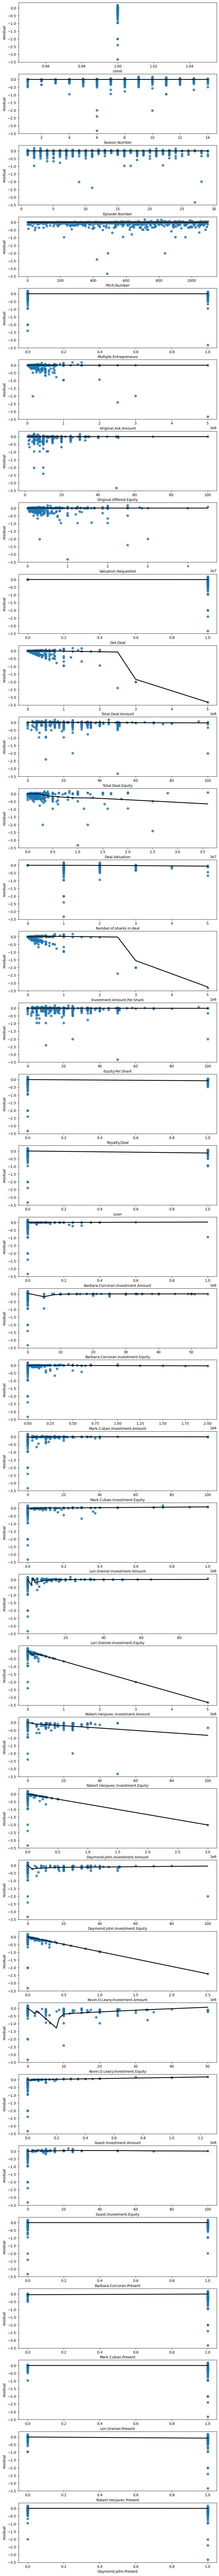

In [ ]:
fig, ax = plt.subplots(36,figsize =(10,130))
resid_2 = results_2.resid
for i in range(36): 
  # create a residual plot for that variable ('i' indexes the variables)
  # The argument ax = ax[i] puts the plot into the subplot
  sns.regplot(x = X.iloc[:,i], y = resid_2, lowess=True, ax = ax[i], line_kws = {'color': 'black'})
  #sns.regplot(x = X.iloc[:,i], y = resid, lowess=True, ax = ax[i])

  ax[i].set_xlabel(X.columns[i])
  ax[i].set_ylabel("residual")

SECOND ASSUMPTION

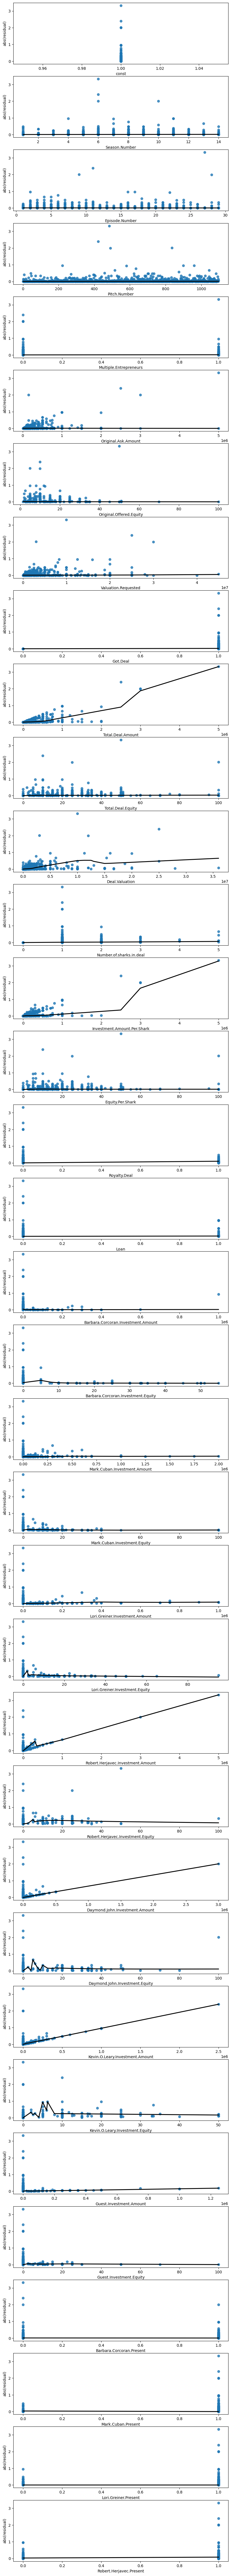

In [ ]:
var_c(results_2)

In [ ]:
resid_2[1]

-0.14869938348419964

THIRD ASSUMPTION

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.03867369, 0.03690944, 0.04078563, 0.04216925, 0.18569903,
        0.07725457, 0.09936363, 0.0218708 , 0.03232962, 0.03122714,
        1.        , 0.03122714, 0.03232962, 0.0218708 , 0.09936363,
        0.07725457, 0.18569903, 0.04216925, 0.04078563, 0.03690944,
        0.03867369]),
 <matplotlib.lines.Line2D at 0x7f972a83bfd0>)

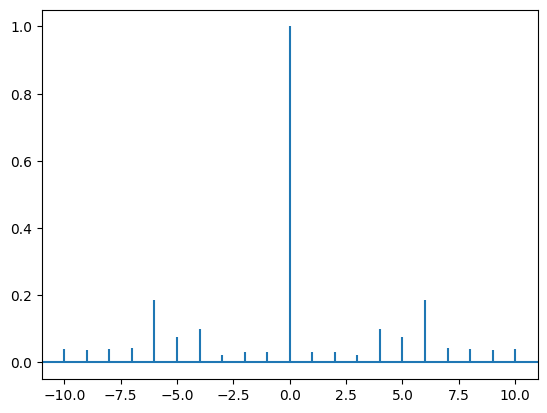

In [ ]:
resid_2 = results_2.resid
plt.acorr(resid_2)


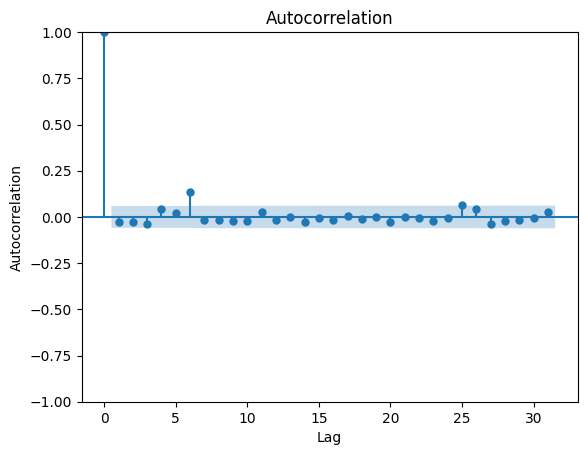

In [ ]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(resid_2)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

FOURTH ASSUMPTION

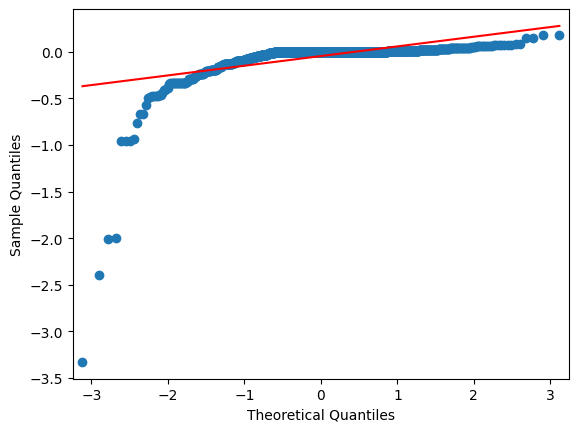

In [ ]:
sm.qqplot(resid_2, line = 'r') 
plt.show()

random code

In [ ]:
def resid_plot(x,y):
  model = sm.OLS(y, sm.add_constant(X))
  results = model.fit()
  print(results.summary())
  plt.plot(x,results.resid,'.',markersize=0.5)
  sns.regplot(x = x, y= results.resid, lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})


In [ ]:
ias = df['Investment.Amount.Per.Shark']
X = df['Original.Ask.Amount']
#X = sm.add_constant(X)


In [ ]:
model = sm.OLS(ias, sm.add_constant(X))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Investment.Amount.Per.Shark   R-squared:                       0.257
Model:                                     OLS   Adj. R-squared:                  0.256
Method:                          Least Squares   F-statistic:                     378.5
Date:                         Sat, 29 Apr 2023   Prob (F-statistic):           1.23e-72
Time:                                 16:47:28   Log-Likelihood:                -15181.
No. Observations:                         1097   AIC:                         3.037e+04
Df Residuals:                             1095   BIC:                         3.038e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.258e+04   9392.927      3.469      0.001    1.42e+04     5.1e+04
Original.Ask.Amount     0.3926      0.020     19.454      0.000       0.353       0.432
==============================================================================
Omnibus:                      929.005   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98437.816
Skew:                           3.281   Prob(JB):                         0.00
Kurtosis:                      48.941   Cond. No.                     5.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""